# Data Science Programming Assignment 3

<ul>
    <li>Load the Combined Cycle Power Plant dataset</li>
    <li>Visualize the distribution of each attibute</li>
    <li>Split the data into training and test sets</li>
    <li>For the support vector models to perform better, scale the data</li>
    <li>Build a linear SVR model and analyse its performances</li>
    <li>Build a SVR model with a linear kernel and compare its performances with the Linear SVR model</li>
    <li>Using a sample from the original data, plot learning curve for the SVR model and interpret the results</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVR,SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
ccpp=pd.read_csv("ccpp.csv",header='infer')

### Visualizing the distriution of the attributes using Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023664B22C18>,
      dtype=object)

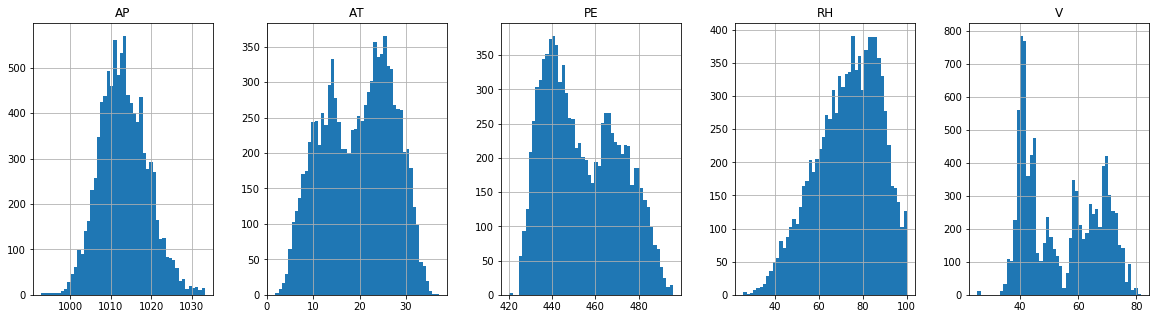

In [33]:
ccpp.hist(bins=50,figsize=(20,5),layout=(1,5))

In [3]:
X=ccpp.iloc[:, 0:4]
y=ccpp.iloc[:,4:]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Linear Support Vector Regression

In [5]:
Linear_SV_Reg=Pipeline([("scaler",StandardScaler()),("linear_SVR",LinearSVR(epsilon=1.5))])

In [6]:
Linear_SV_Reg.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_SVR', LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

In [8]:
Linear_SV_Reg.named_steps['linear_SVR'].intercept_[0]

453.8097385112487

In [9]:
Linear_SV_Reg.named_steps['linear_SVR'].coef_

array([-15.11169763,  -2.91514742,   0.26160427,  -2.23657347])

In [7]:
Linear_SV_Reg_Result=Linear_SV_Reg.predict(X_test)

In [17]:
print('Root Mean Squared Error: '+ str(round(math.sqrt(mean_squared_error(y_test, Linear_SV_Reg_Result)),2)))

Root Mean Squared Error: 4.69


### Support Vector Regression with a Linear Kernel

In [10]:
SV_Reg=Pipeline([("scaler",StandardScaler()),("SVR",SVR(kernel='linear',epsilon=1.5))])

In [11]:
SV_Reg.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVR', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=1.5,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))])

In [12]:
SV_Reg.named_steps['SVR'].intercept_[0]

454.2655624090893

In [13]:
SV_Reg.named_steps['SVR'].coef_[0]

array([-15.13521745,  -2.86593712,   0.2571915 ,  -2.2543924 ])

In [14]:
SV_Reg_Result=SV_Reg.predict(X_test)

In [18]:
print('Root Mean Squared Error: '+ str(round(math.sqrt(mean_squared_error(y_test, SV_Reg_Result)),2)))

Root Mean Squared Error: 4.64


#### Comparision of the above models:

Both the Linear SVR and the SVR with a linear kernel perform alike. The intercept and the coefficients of both the models are in the close vicinity. Unsurprisingly, both the models have similar and lower Root Mean Squared Error.

### Learning curve for the Support Vector Regression Model

In [19]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X[0:100], y[0:100], test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

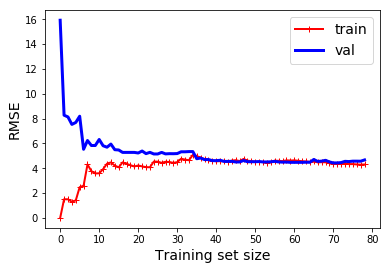

In [20]:
plot_learning_curves(SV_Reg.named_steps['SVR'],X,y)

The training curve starts at 0 which is due to a perfect fitting of the model due to fewer training instances and gradually the RMSE increases and reaches a threshold. Similarly, the validation curve starts at a higher error value but as the number of training instances increase, the model generalises well and the error term of the validation curve almost joins hands with that of the training curve.